In [ ]:
# 4,7,

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8681 - loss: 0.4652 - val_accuracy: 0.9608 - val_loss: 0.1366
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9676 - loss: 0.1128 - val_accuracy: 0.9700 - val_loss: 0.0938
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9787 - loss: 0.0717 - val_accuracy: 0.9759 - val_loss: 0.0762
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9862 - loss: 0.0491 - val_accuracy: 0.9772 - val_loss: 0.0714
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9904 - loss: 0.0351 - val_accuracy: 0.9789 - val_loss: 0.0675


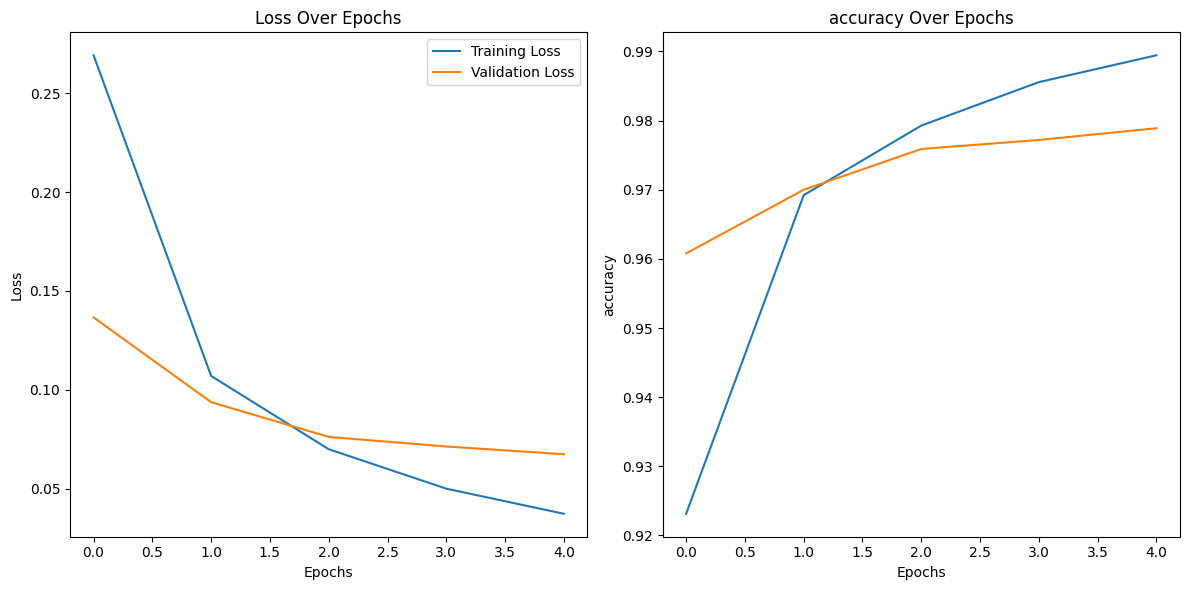

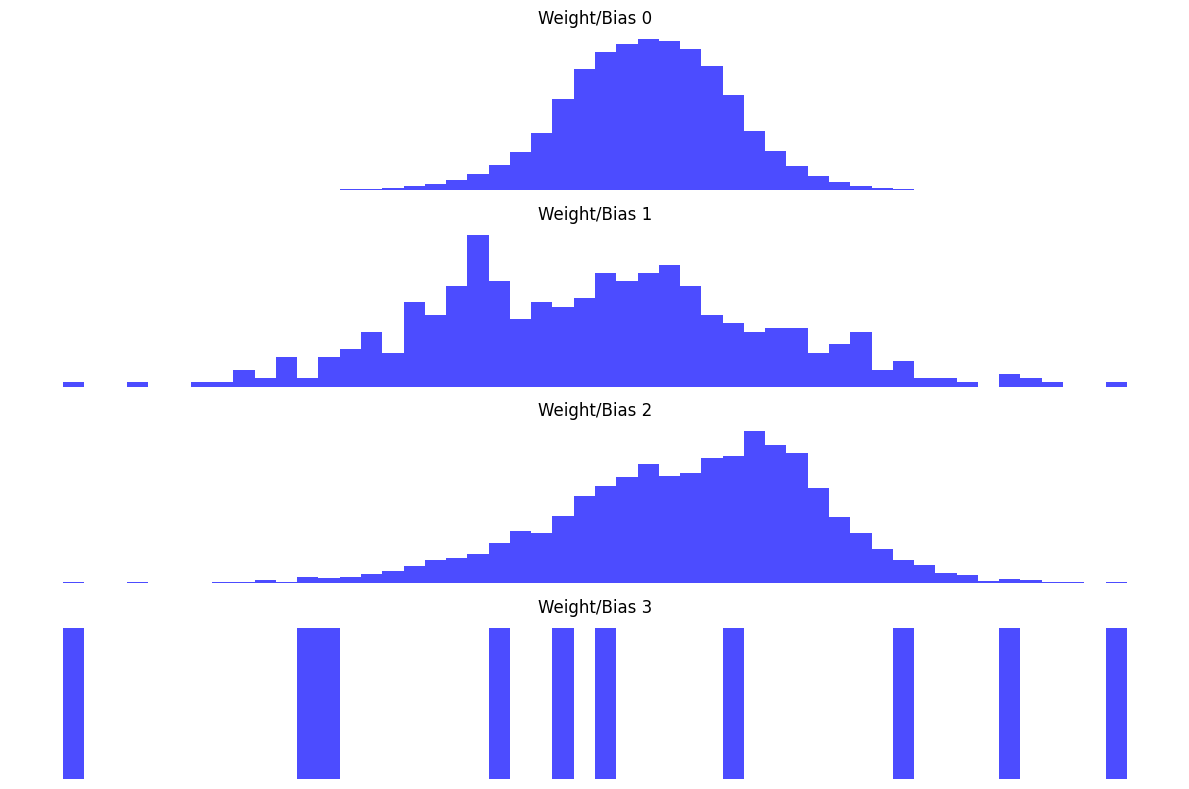

Test loss: 6.746444851160049
Test accuracy: 97.89000153541565


In [33]:
# 1,2. Simple Neural Network,  min_accuracy = 95%, 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.utils import to_categorical
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0],784)
x_test = x_test.reshape(x_test.shape[0],784)

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train,y_train,batch_size=128,epochs=5, verbose=1, validation_data=(x_test,y_test))



plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='Training accuracy')
plt.plot(history.history['val_accuracy'],label='Validation accuracy')
plt.title('accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('accuracy')

plt.tight_layout()
plt.show()

weights = model.get_weights()
num_plots = len(weights)
plt.figure(figsize=(12,8))
for i,weight in enumerate(weights):
    plt.subplot(num_plots,1,i+1)
    plt.hist(weight.flatten(),bins=50,color='blue',alpha=0.7)
    plt.title(f'Weight/Bias {i}')
    plt.axis('off')
plt.tight_layout()
plt.show()
    
score= model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0] * 100)
print('Test accuracy:',score[1] * 100)




In [35]:
# 3 CNN min_accuracy = 98%
from keras.layers import Conv2D,MaxPooling2D
(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)

cnmodel = Sequential()

cnmodel.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(28,28,1)))
cnmodel.add(MaxPooling2D((2,2)))
cnmodel.add(Conv2D(64,(3,3),activation = 'relu'))
cnmodel.add(MaxPooling2D((2,2))) 
cnmodel.add(Conv2D(128,(3,3),activation = 'relu'))
cnmodel.add(MaxPooling2D((2,2)))
cnmodel.add(Flatten())
cnmodel.add(Dense(512,activation = 'relu'))
cnmodel.add(Dense(128,activation = 'relu'))
cnmodel.add(Dense(10,activation = 'softmax'))

cnmodel.compile(optimizer='adam',loss='categorical_crossentropy',metrics = ['accuracy'])

history = cnmodel.fit(x_train,y_train,batch_size=128,epochs=5,verbose=1,validation_data=(x_test,y_test))
score = cnmodel.evaluate(x_test,y_test,verbose=0)
print(score)




Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.7997 - loss: 0.6328 - val_accuracy: 0.9570 - val_loss: 0.1304
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9712 - loss: 0.0914 - val_accuracy: 0.9757 - val_loss: 0.0782
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9811 - loss: 0.0607 - val_accuracy: 0.9836 - val_loss: 0.0544
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.9864 - loss: 0.0442 - val_accuracy: 0.9856 - val_loss: 0.0467
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.9875 - loss: 0.0382 - val_accuracy: 0.9849 - val_loss: 0.0532
[0.05316651612520218, 0.9848999977111816]


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 106s 217ms/step - accuracy: 0.8388 - loss: 0.5139 - val_accuracy: 0.9697 - val_loss: 0.1043
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 205ms/step - accuracy: 0.9673 - loss: 0.1096 - val_accuracy: 0.9765 - val_loss: 0.0749
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 100s 213ms/step - accuracy: 0.9799 - loss: 0.0695 - val_accuracy: 0.9864 - val_loss: 0.0509
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 97s 206ms/step - accuracy: 0.9851 - loss: 0.0511 - val_accuracy: 0.9844 - val_loss: 0.0524
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 100s 214ms/step - accuracy: 0.9889 - loss: 0.0366 - val_accuracy: 0.9852 - val_loss: 0.0531
Test loss: 0.05305144563317299
Test accuracy: 0.9851999878883362


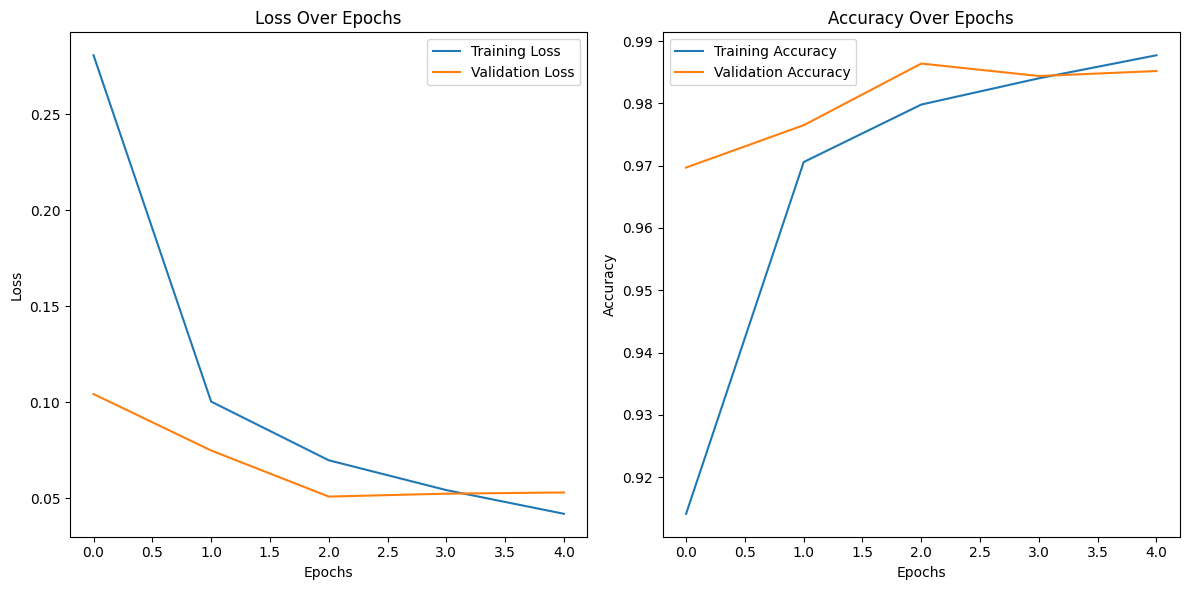

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


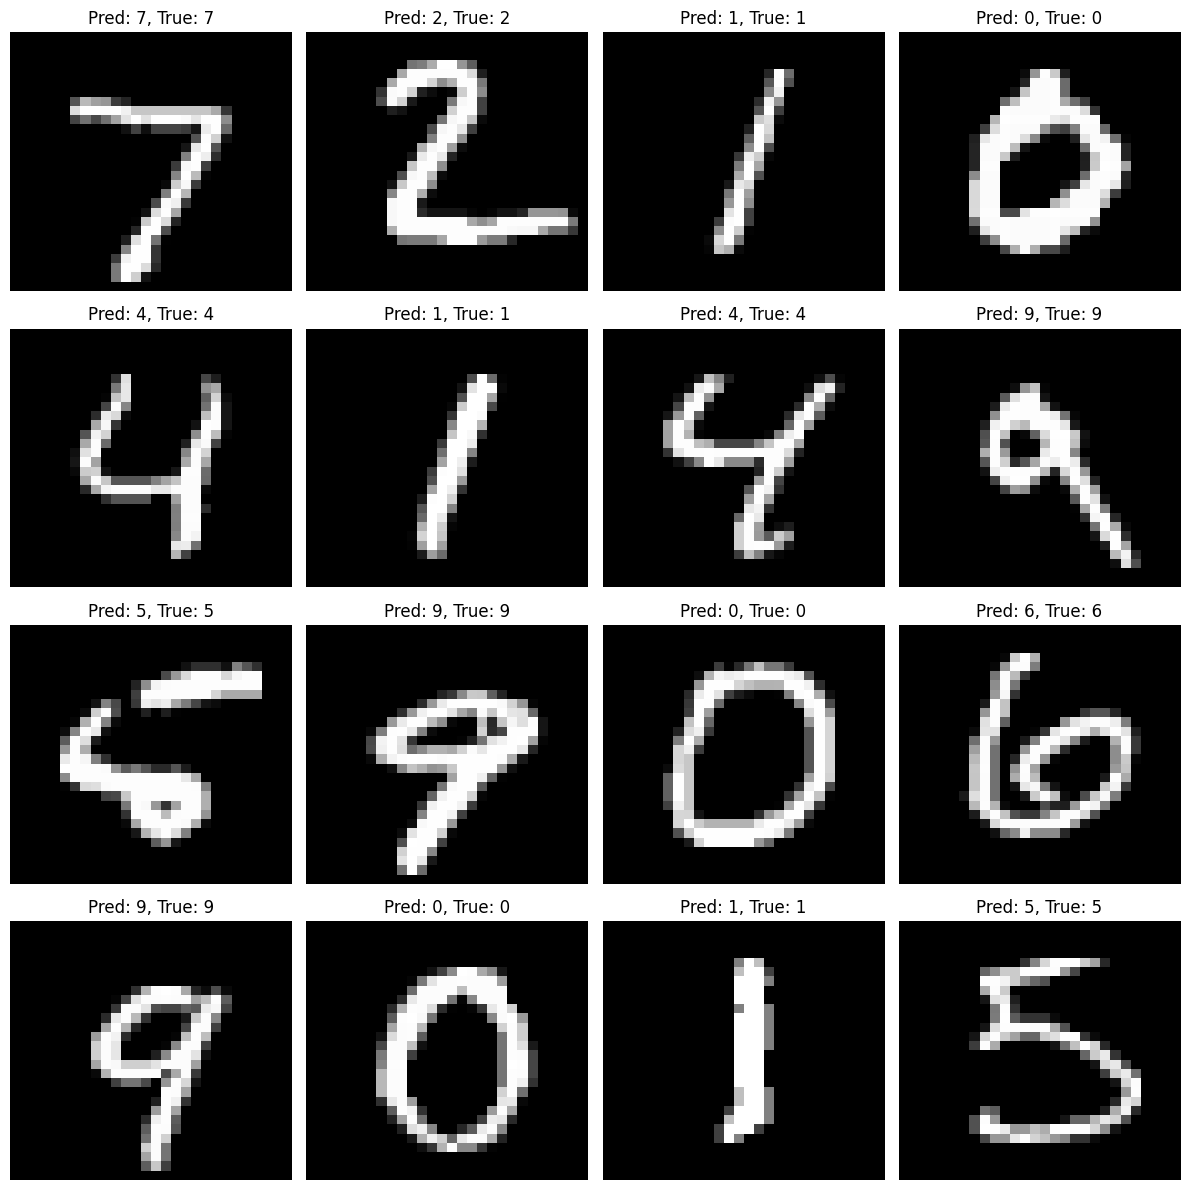

In [44]:
# 5,6 Rnn  min_accuracy = 90% 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import LSTM, Dense, SimpleRNN, GRU
from keras.utils import to_categorical
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Preprocess the data for LSTM (reshape to (samples, timesteps, features))
x_train = x_train.reshape(x_train.shape[0], 28, 28)  # 28 timesteps, 28 features (pixels)
x_test = x_test.reshape(x_test.shape[0], 28, 28)  # Same reshaping for test data

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define RNN architecture with LSTM
model = Sequential()
model.add(LSTM(512, return_sequences=False, input_shape=(28, 28)))  # LSTM layer with 512 units (no return_sequences)
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Output layer with 10 classes (one for each digit)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model (reduced epochs for faster execution in this example)
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plot training and validation loss
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Visualize some predictions
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Plot a few test images with predicted and true labels
plt.figure(figsize=(12, 12))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_test[i], cmap='gray', aspect='auto')
    plt.title(f"Pred: {predicted_classes[i]}, True: {true_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [47]:
# 7.Implement a CNN model using Keras to classify handwritten digits from the MNIST dataset. Achieve a minimum accuracy of 95% on the test set.

# Load the MNIST dataset using Keras' datasets module.
# Preprocess the data by normalizing the pixel values.
# Define a CNN architecture using Keras' Sequential API:
# Input layer with 28x28 images
# Convolutional layer with 32 filters and ReLU activation
# Max pooling layer with 2x2 pool size
# Convolutional layer with 64 filters and ReLU activation
# Max pooling layer with 2x2 pool size
# Flatten layer
# Dense layer with 128 neurons and ReLU activation
# Output layer with 10 neurons and softmax activation
# Compile the model with a suitable optimizer (e.g., Adam) and loss function (e.g., categorical cross-entropy).
# Train the model on the training set and evaluate its performance on the test set.
# Use PyTorch to fine-tune a pre-trained CNN model on the MNIST dataset.

# Load a pre-trained CNN model using PyTorch’s torchvision module.
# Freeze the weights of the pre-trained model.
# Add a new classification layer on top of the pre-trained model.
# Compile the model with a suitable optimizer and loss function.
# Train the model on the training set and evaluate its performance on the test set.

(x_train,y_train), (x_test,y_test) = mnist.load_data()

x_train = x_train.astype('float32')/32
x_test = x_test.astype('float32')/32

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train,y_train,batch_size=128,epochs=5,validation_data=(x_test,y_test))

score = model.evaluate(x_test,y_test,verbose=1)
print(score)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - accuracy: 0.8939 - loss: 0.3518 - val_accuracy: 0.9866 - val_loss: 0.0421
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9876 - loss: 0.0427 - val_accuracy: 0.9881 - val_loss: 0.0345
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9913 - loss: 0.0284 - val_accuracy: 0.9886 - val_loss: 0.0321
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9928 - loss: 0.0230 - val_accuracy: 0.9894 - val_loss: 0.0298
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9959 - loss: 0.0144 - val_accuracy: 0.9891 - val_loss: 0.0331
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9867 - loss: 0.0422
[0.03308359906077385, 0.9890999794006348]


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7373 - loss: 0.9592 - val_accuracy: 0.9411 - val_loss: 0.2064
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9356 - loss: 0.2229 - val_accuracy: 0.9587 - val_loss: 0.1414
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9567 - loss: 0.1502 - val_accuracy: 0.9664 - val_loss: 0.1122
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9650 - loss: 0.1200 - val_accuracy: 0.9721 - val_loss: 0.0902
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9711 - loss: 0.0955 - val_accuracy: 0.9744 - val_loss: 0.0806
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9767 - loss: 0.0773 - val_accuracy: 0.9767 - val_loss: 0.0732
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9806 - loss: 0.0634 - val_accuracy: 0.9801 - val_loss: 0.0665
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9833 - loss: 0.0549 - val_accu

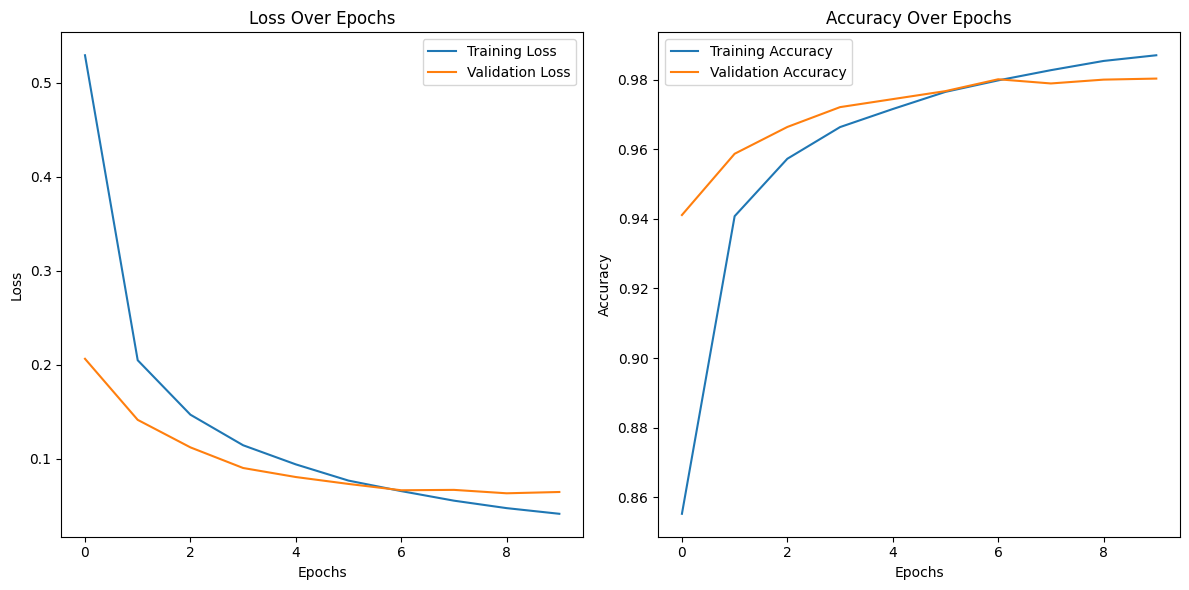

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


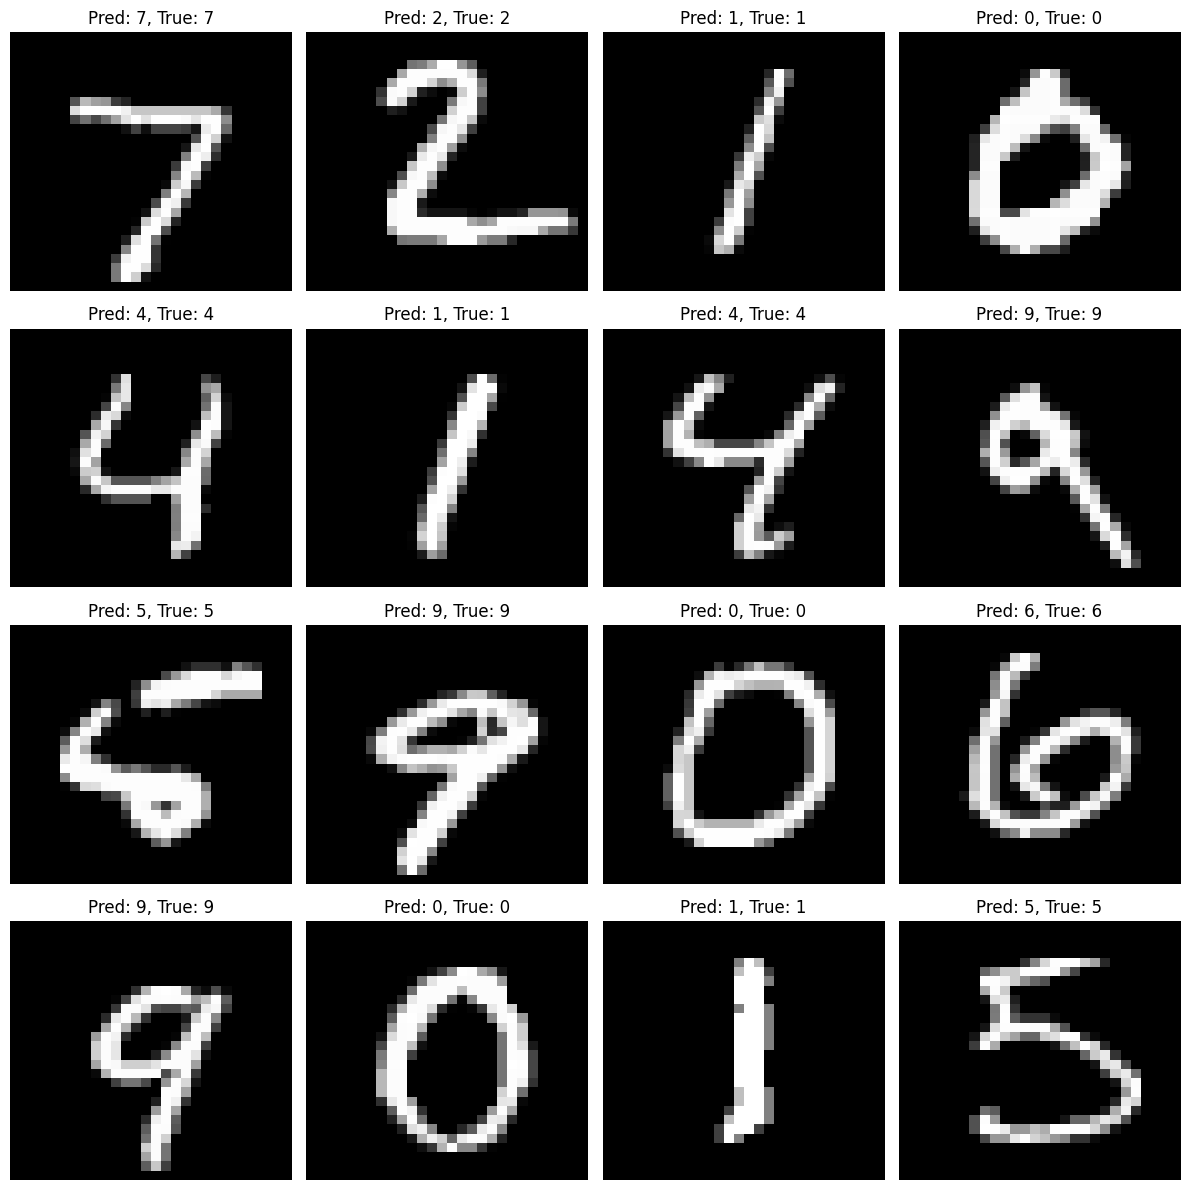

In [57]:
# 11 Implement a Deep Neural Network using Keras to classify handwritten digits from the MNIST dataset. Achieve a minimum accuracy of 98% on the test set.

# Load the MNIST dataset using Keras' datasets module.
# Preprocess the data by normalizing the pixel values.
# Define a Deep Neural Network architecture using Keras' Sequential API:
# Input layer with 784 neurons
# Hidden layer with 512 neurons and ReLU activation
# Hidden layer with 256 neurons and ReLU activation
# Output layer with 10 neurons and softmax activation
# Compile the model with a suitable optimizer (e.g., Adam) and loss function (e.g., categorical cross-entropy).
# Train the model on the training set and evaluate its performance on the test set.

from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Flatten the input data from 28x28 images to 784-dimensional vectors
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

# Convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the Deep Neural Network architecture
model = Sequential()
# Input layer with 784 neurons (flattened input)
model.add(Dense(784, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
# Hidden layer with 512 neurons
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
# Hidden layer with 256 neurons
model.add(Dense(256, activation='relu'))

# Output layer with 10 neurons (for the 10 classes)
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=AdamW(learning_rate=0.0001), metrics=['accuracy'])



early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True, verbose=1)

# Train the model and store the history
history = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test),callbacks=[early_stopping])

# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0] * 100)
print('Test accuracy:', score[1] * 100)

# Plot training and validation loss
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Predictions on test data
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Visualize predictions
plt.figure(figsize=(12, 12))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray', aspect='auto')
    plt.title(f"Pred: {predicted_classes[i]}, True: {true_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [1]:
# 12
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

# Define transformations for MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to range [-1, 1]
])

# Load MNIST dataset
train_dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root="./data", train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Simple neural network model
class GradientBoostingNet(nn.Module):
    def __init__(self, input_size, output_size):
        super(GradientBoostingNet, self).__init__()
        self.fc = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        return self.fc(x)

# Initialize models for gradient boosting
num_stages = 5  # Number of boosting stages
input_size = 28 * 28  # Flattened MNIST images
output_size = 10  # 10 classes for digits 0-9

models = [GradientBoostingNet(input_size, output_size) for _ in range(num_stages)]
optimizers = [optim.Adam(model.parameters(), lr=0.01) for model in models]
criterion = nn.CrossEntropyLoss()

# Move models to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
for model in models:
    model.to(device)

# Training the models
for stage, model in enumerate(models):
    print(f"Training stage {stage + 1}/{num_stages}")
    for epoch in range(2):  # Train for fewer epochs per stage
        model.train()
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            images = images.view(images.size(0), -1)  # Flatten images
            
            # Forward pass and compute residuals
            outputs = torch.zeros_like(labels, dtype=torch.float, device=device)
            for prev_model in models[:stage]:  # Aggregate outputs from previous stages
                outputs += prev_model(images)
            
            residuals = labels - outputs
            logits = model(images)
            loss = criterion(logits, residuals)
            
            # Backward pass and optimization
            optimizers[stage].zero_grad()
            loss.backward()
            optimizers[stage].step()

# Evaluating the ensemble model
def evaluate_ensemble(models, loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            images = images.view(images.size(0), -1)  # Flatten images
            
            outputs = torch.zeros(labels.size(0), 10, device=device)
            for model in models:
                outputs += model(images)  # Aggregate predictions
            
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

# Test accuracy
test_accuracy = evaluate_ensemble(models, test_loader)
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Plot some predictions
data_iter = iter(test_loader)
images, labels = next(data_iter)
images, labels = images.to(device), labels.to(device)
images_flat = images.view(images.size(0), -1)

outputs = torch.zeros(labels.size(0), 10, device=device)
for model in models:
    outputs += model(images_flat)

_, predicted = torch.max(outputs, 1)

# Visualize predictions
plt.figure(figsize=(12, 12))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].cpu().numpy().squeeze(), cmap='gray', aspect='auto')
    plt.title(f"Pred: {predicted[i].item()}, True: {labels[i].item()}")
    plt.axis('off')
plt.tight_layout()
plt.show()


Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

Training stage 1/5


RuntimeError: expected scalar type Long but found Float

In [ ]:
# 13 Implement a Convolutional Neural Network (CNN) using Keras to classify handwritten digits from the MNIST dataset. Achieve a minimum accuracy of 99% on the test set.

# - Load the MNIST dataset using Keras' datasets module.
# - Preprocess the data by normalizing the pixel values.
# - Define a CNN architecture using Keras' Sequential API:
#     - Input layer with 28x28 images
#     - Convolutional layer with 32 filters and ReLU activation
#     - Max pooling layer with 2x2 pool size
#     - Convolutional layer with 64 filters and ReLU activation
#     - Max pooling layer with 2x2 pool size
#     - Flatten layer
#     - Dense layer with 128 neurons and ReLU activation
#     - Output layer with 10 neurons and softmax activation
# - Compile the model with a suitable optimizer (e.g., Adam) and loss function (e.g., categorical cross-entropy).
# - Train the model on the training set and evaluate its performance on the test set.
